**Fabric softness prediction using supervised machine learning**

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import math

**importinging the dataset**

In [ ]:
dataset = pd.read_csv('Softness(1).csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(dataset.head())

   Batch No  Total Weight(Kgs)  ...  Temprature(Celcius)  Reduced Weight(Kgs)
0         1                 64  ...                   90                55.78
1         2                 62  ...                   95                52.64
2         3                 61  ...                   93                54.55
3         4                 67  ...                   91                60.56
4         5                 66  ...                   96                59.59

[5 rows x 7 columns]


In [ ]:
dataset.corr()

,Batch No,Total Weight(Kgs),Total Meters,NaOH(Kgs),Purity of Water(ppm),Temprature(Celcius),Reduced Weight(Kgs)
Batch No,1.000000,0.084030,0.038888,0.151360,0.051380,-0.056893,-0.152925
Total Weight(Kgs),0.084030,1.000000,0.011531,0.723998,-0.103573,-0.023954,-0.245629
Total Meters,0.038888,0.011531,1.000000,-0.165727,-0.128474,0.085033,0.200593
NaOH(Kgs),0.151360,0.723998,-0.165727,1.000000,-0.018642,0.078358,-0.815941
Purity of Water(ppm),0.051380,-0.103573,-0.128474,-0.018642,1.000000,0.083017,-0.001433
Temprature(Celcius),-0.056893,-0.023954,0.085033,0.078358,0.083017,1.000000,-0.143597
Reduced Weight(Kgs),-0.152925,-0.245629,0.200593,-0.815941,-0.001433,-0.143597,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
#print(y_pred.reshape(len(y_pred),1))
#print(y_test.reshape(len(y_test),1))
print(regressor.intercept_)
print(regressor.coef_)

print(regressor.score(X_test, y_test))

4.270098716112685
[ 1.01 -0.   -0.02  0.01 -0.06]
0.8879721764139517


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Value')

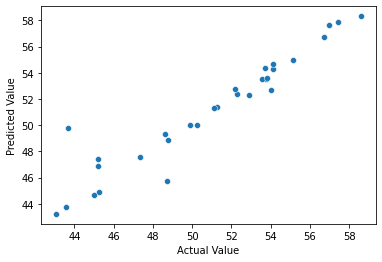

In [ ]:
vs1 = sns.scatterplot(y_pred,y_test)
vs1.set_xlabel('Actual Value')
vs1.set_ylabel('Predicted Value')

In [ ]:
#printing Error and accuracy rate
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)), "R2 Score:", r2_score(y_test,y_pred))

RMSE:  1.4049018877500112 R2 Score: 0.8879721764139517


**After applying Feature Scaling**

In [ ]:
dataset_fs = pd.read_csv('Softness(1).csv')
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_af_fs = sc.fit(dataset_fs)

X_fs = dataset_fs.iloc[:, 1:-1].values
y_fs = dataset_fs.iloc[:, -1].values

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor_fs = LinearRegression()
regressor_fs.fit(X_train_fs, y_train_fs)

y_pred = regressor_fs.predict(X_test_fs)

print(regressor_fs.score(X_test_fs, y_test_fs))

0.8879721764139517


**Rigde and Lasso Regression**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
rd = Ridge()
rd.fit(X_train, y_train)

y_pred_rd = rd.predict(X_test)

print(rd.score(X_test, y_test))
print(rd.intercept_)
print(rd.coef_)


print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred_rd)), "R2 Score:", r2_score(y_test,y_pred_rd))

0.8880211624610592
4.382653912847495
[ 1.01 -0.   -0.02  0.01 -0.06]
RMSE:  1.4045946956938922 R2 Score: 0.8880211624610592


In [ ]:
#alpha increases in ridge
from sklearn.linear_model import Ridge, Lasso
rd = Ridge(alpha=55)
rd.fit(X_train, y_train)

y_pred_rd = rd.predict(X_test)

print(rd.score(X_test, y_test))
print(rd.intercept_)
print(rd.coef_)

print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred_rd)), "R2 Score:", r2_score(y_test,y_pred_rd))

0.8886962966909815
9.773073345192877
[ 0.92 -0.   -0.02  0.01 -0.06]
RMSE:  1.4003540568216972 R2 Score: 0.8886962966909815


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Value')

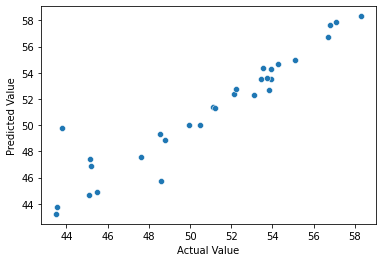

In [ ]:
vs1 = sns.scatterplot(y_pred_rd,y_test)
vs1.set_xlabel('Actual Value')
vs1.set_ylabel('Predicted Value')

In [ ]:
ls = Lasso(alpha=5)
ls.fit(X_train, y_train)

y_pred_ls = ls.predict(X_test)

#print(rd.score(X_test, y_test))
print(ls.intercept_)
print(ls.coef_)
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred_ls)), "R2 Score:", r2_score(y_test,y_pred_ls))

59.2066245366585
[ 0.    0.   -0.01 -0.   -0.  ]
RMSE:  2.3278687588307374 R2 Score: 0.6924251006823187
